##  Python ML Practice 1: risk_factors_cervical_cancer

*NYC Data Science Academy,  Jing Wang,  2017-08*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
data = pd.read_csv(url, na_values='?')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [14]:
data.shape

(858, 36)

In [22]:
# checking missing value proportion
data.count().sort_values() /data.shape[0]

STDs: Time since last diagnosis       0.082751
STDs: Time since first diagnosis      0.082751
IUD                                   0.863636
IUD (years)                           0.863636
Hormonal Contraceptives               0.874126
Hormonal Contraceptives (years)       0.874126
STDs:syphilis                         0.877622
STDs:HPV                              0.877622
STDs:Hepatitis B                      0.877622
STDs:HIV                              0.877622
STDs:AIDS                             0.877622
STDs:molluscum contagiosum            0.877622
STDs:genital herpes                   0.877622
STDs:pelvic inflammatory disease      0.877622
STDs:vulvo-perineal condylomatosis    0.877622
STDs:cervical condylomatosis          0.877622
STDs:condylomatosis                   0.877622
STDs (number)                         0.877622
STDs                                  0.877622
STDs:vaginal condylomatosis           0.877622
Num of pregnancies                    0.934732
Number of sex

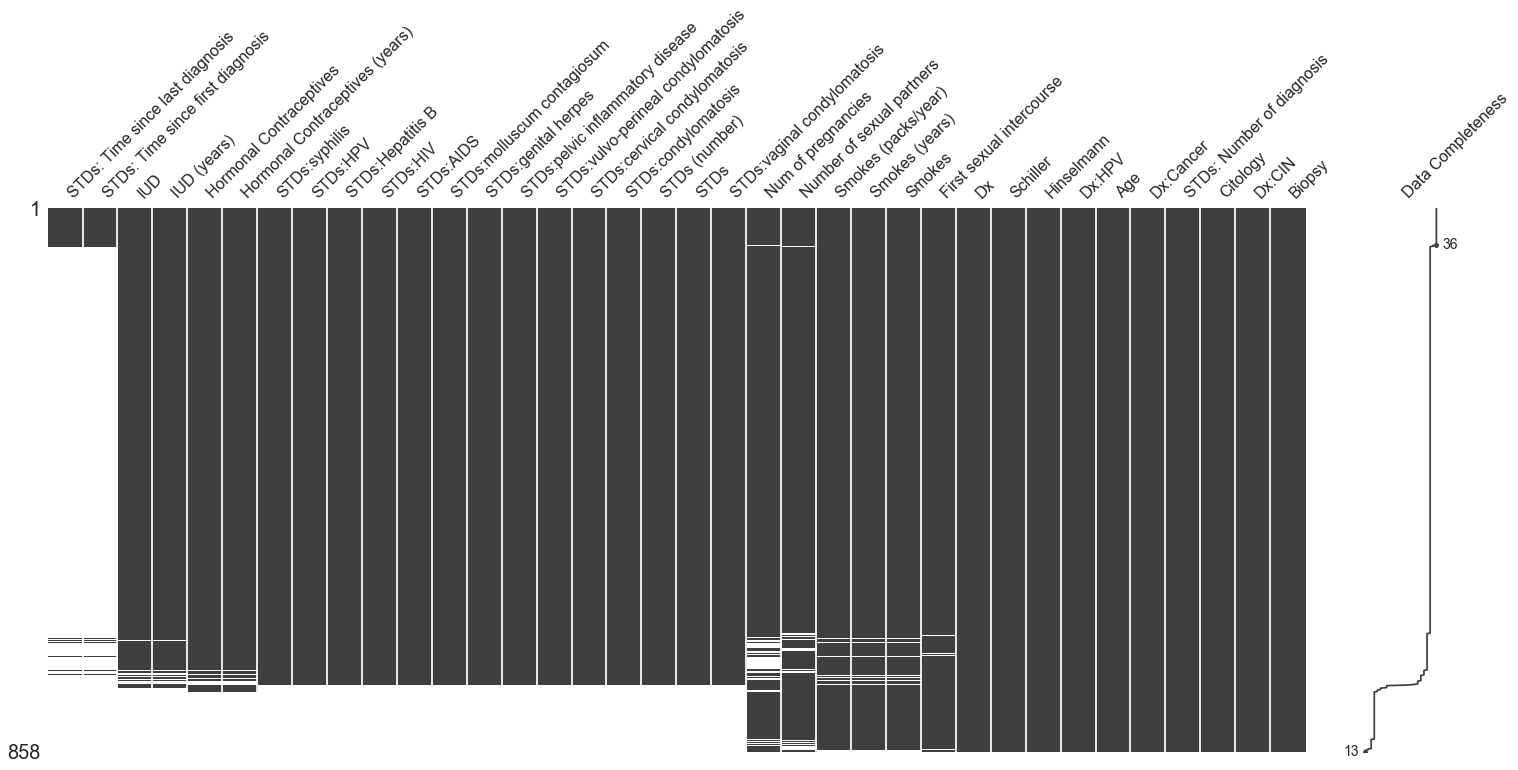

In [16]:
colnames = data.count().sort_values().index
msno.matrix(msno.nullity_sort(data[colnames], sort='descending'), labels=True)

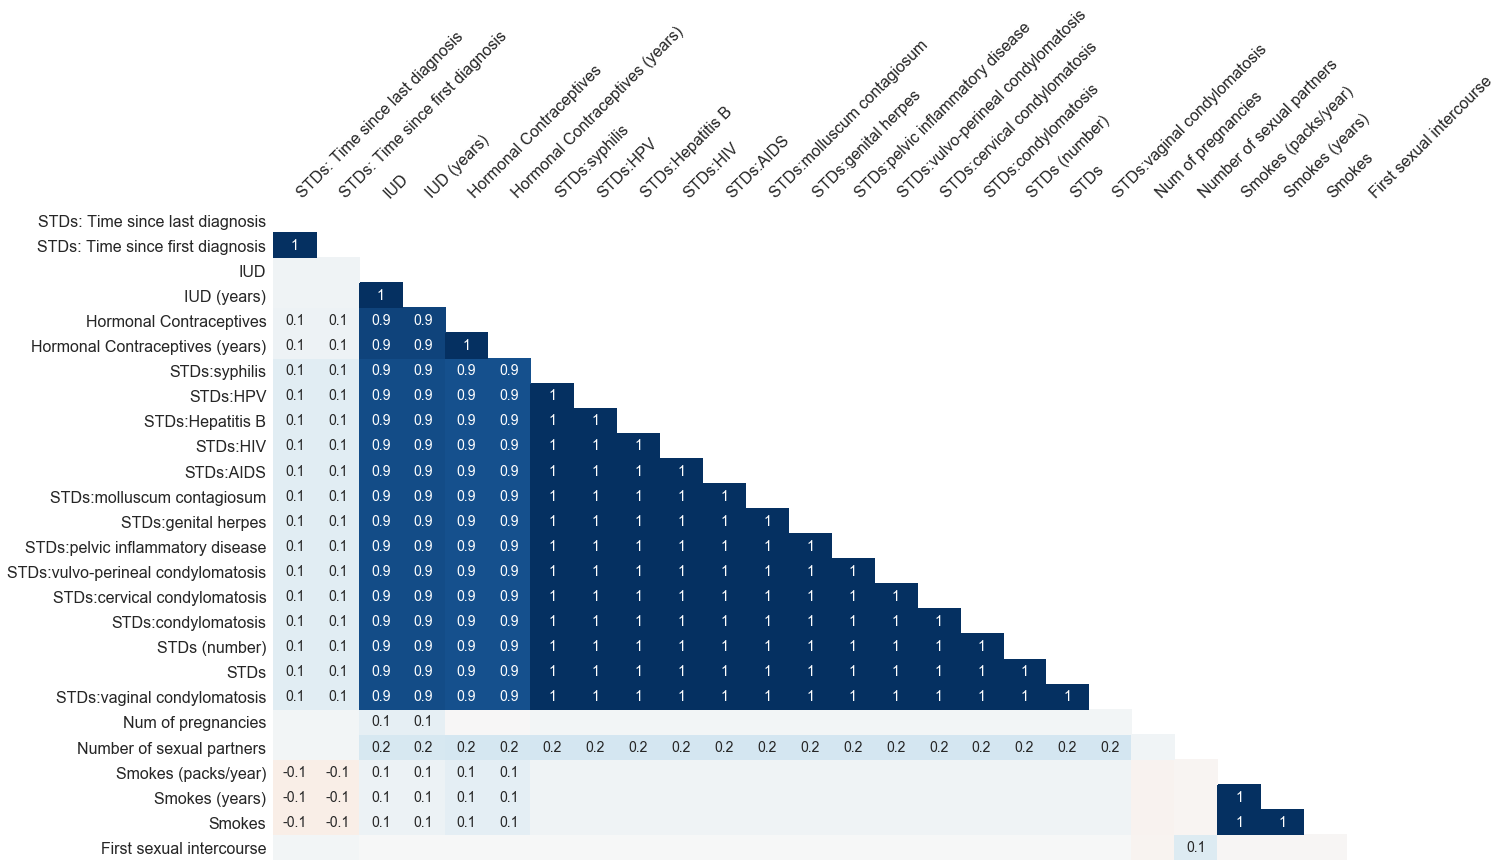

In [17]:
msno.heatmap(data[colnames])

In [24]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [182]:
# columns selections
drop_cols = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
std_cols = [ 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis']

feature_cols = ['STDs (number)','Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives', 
                'Hormonal Contraceptives (years)', 'IUD','IUD (years)','Dx:Cancer', 'Dx:CIN', 
                'Dx:HPV', 'Dx','STDs', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

plot_cols=['Age', 'Number of sexual partners','Num of pregnancies', 'Smokes (years)', 'Biopsy']

### Subset of data 

In [127]:
data_sub = data[feature_cols]
data_sub.fillna(-1, inplace=True)

X = data_sub.iloc[:,0:-4].copy() 
y = data_sub.iloc[:,-1].copy()

print(data_sub.shape)
print(X.shape)
print(y.shape)

(858, 21)
(858, 17)
(858,)


/Users/wanggene/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


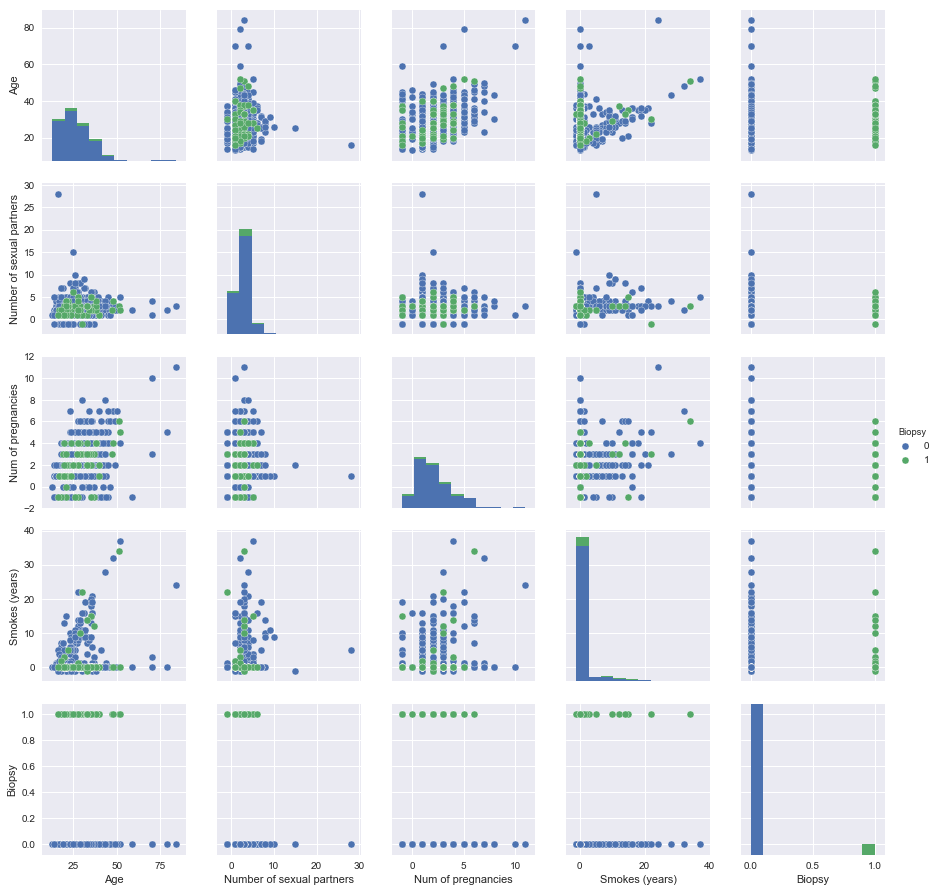

In [186]:
sns.pairplot(data_sub[plot_cols], hue='Biopsy')

### Split Train/Test dataset

In [129]:
from sklearn.cross_validation import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### K-NN (K=5)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.925581395349


In [147]:
# try K=1 through K=26 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print(max(scores))

0.925581395349


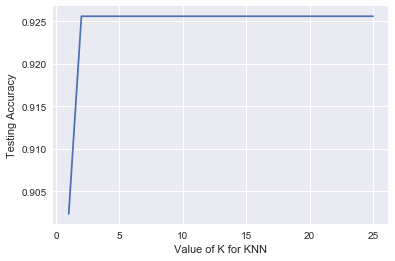

In [148]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_log))

0.925581395349


### 10 Fold Cross-validation, KNN = 5

In [149]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores, '\n')
print(scores.mean())

[ 0.91954023  0.93103448  0.91954023  0.93023256  0.93023256  0.94117647
  0.94117647  0.94117647  0.94117647  0.92941176] 

0.932469770587


In [158]:
# search for an optimal value of K for KNN
k_range = list(range(1, 30))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores,'\n')
print(knn)

[0.89054986870449881, 0.93245640517634487, 0.92894067330219987, 0.93479566646225454, 0.93246977058666292, 0.93594509174961082, 0.93479566646225454, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082, 0.93594509174961082] 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')


0.93594509175 



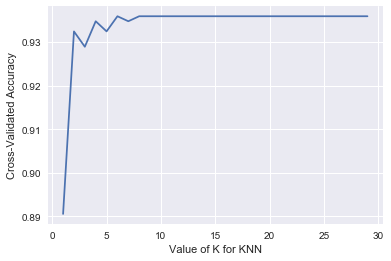

In [159]:
print(max(k_scores), '\n')
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


### Logistic Regression Model with 10 Fold CV

In [154]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.932415679985


### More efficient parameter tuning using `GridSearchCV`

In [162]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)


/Users/wanggene/miniconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

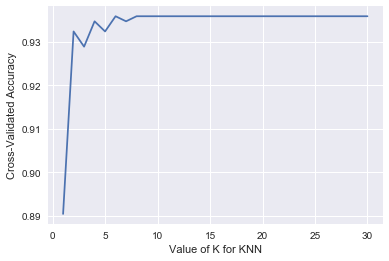

In [165]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [191]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9358974358974359
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


### Check Null Accuracy

In [187]:
y_test.value_counts()

0    199
1     16
Name: Biopsy, dtype: int64

In [189]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.92558139534883721

### Metrics computed from a confusion matrix

In [199]:
y_pred_class = grid.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[199   0]
 [ 16   0]]


In [196]:
# Classification Accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.925581395349


In [197]:
# Classification Error
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0744186046512


In [198]:
# Sensitivity
print(metrics.recall_score(y_test, y_pred_class))

0.0


In [200]:
# Specificity
print(TN / float(TN + FP))

1.0


### Adjusting the classification threshold

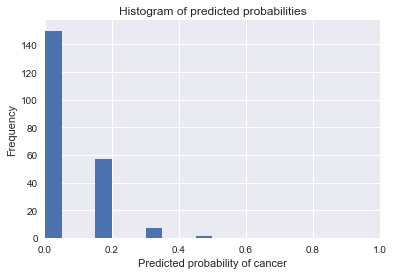

In [206]:
y_pred_prob = grid.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of cancer')
plt.ylabel('Frequency')

In [207]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [208]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[194   5]
 [ 13   3]]


### ROC Curves and Area Under the Curve (AUC)

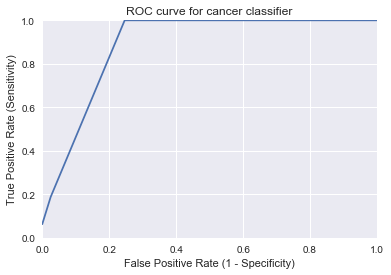

In [209]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [210]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.61077366255144039

In [211]:
cross_val_score(grid, X, y, cv=10, scoring='roc_auc').mean()

0.52667798353909479

### Conclusion

**logistic regression model perform better than knn**